In [1]:
from PIL import Image, ImageOps
import os
from rembg import remove
import pandas as pd
import numpy as np
import cv2
import os
import csv
from skimage.feature import graycomatrix, graycoprops
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

### Prprocessing Citra

In [2]:
# os.makedirs("Kopra_Resize", exist_ok=True)
# os.makedirs("Kopra_Resize/Kopra Edible", exist_ok=True)
# os.makedirs("Kopra_Resize/Kopra Reguler", exist_ok=True)
# os.makedirs("Kopra_Resize/Kopra Reject", exist_ok=True)

# for folder in os.listdir("Kopra"):
#     for filename in os.listdir(os.path.join("Kopra", folder)):
#         img = Image.open(os.path.join("Kopra", folder, filename))
#         img = img.resize((800, 600))
#         img.save(os.path.join("Kopra_Resize", folder, filename))
#         print("Image resized to:", os.path.join("Kopra_Resize", folder, filename))

In [3]:
# os.makedirs("Kopra_Rembg", exist_ok=True)
# os.makedirs("Kopra_Rembg/Kopra Edible", exist_ok=True)
# os.makedirs("Kopra_Rembg/Kopra Reguler", exist_ok=True)
# os.makedirs("Kopra_Rembg/Kopra Reject", exist_ok=True)

# for folder in os.listdir("Kopra_Resize"):
#     for filename in os.listdir(os.path.join("Kopra_Resize", folder)):
#         img = Image.open(os.path.join("Kopra_Resize", folder, filename))
#         result = remove(img)
#         filename = filename.replace(".jpg", ".png")
#         result.save(os.path.join("Kopra_Rembg", folder, filename))
#         print("Background image removed on:", os.path.join("Kopra_Rembg", folder, filename))

In [4]:
# os.makedirs("Kopra_Crop", exist_ok=True)
# os.makedirs("Kopra_Crop/Kopra Edible", exist_ok=True)
# os.makedirs("Kopra_Crop/Kopra Reguler", exist_ok=True)
# os.makedirs("Kopra_Crop/Kopra Reject", exist_ok=True)

# for folder in os.listdir("Kopra_Rembg"):
#     for filename in os.listdir(os.path.join("Kopra_Rembg", folder)):
#         img = Image.open(os.path.join("Kopra_Rembg", folder, filename))
#         img = img.crop(img.getbbox())
#         img.save(os.path.join("Kopra_Crop", folder, filename))
#         print("Image resized to:", os.path.join("Kopra_Crop", folder, filename))

Ekstraksi Fitur

In [5]:
path = 'D:/! Reset Pak Husni Teja Sukmana/2023 - Klasifikasi Kopra metode KNN/Implementasi-KNN/dataset/Kopra_Crop/Kopra Edible'
data = os.listdir(path)

rataR = []
rataG = []
rataB = []
rataH = []
rataS = []
rataV = []
ratagray = []
stand = []
luas = []
perimeter = []
contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
label = []

for gbr in data:
    gbr_read = cv2.imread(os.path.join(path, gbr))
    gbr_rgb = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2RGB)
    (R, G, B) = cv2.split(gbr_rgb)
    meanR = np.mean(R)
    rataR.append(meanR)
    meanG = np.mean(G)
    rataG.append(meanG)
    meanB = np.mean(B)
    rataB.append(meanB)

    gbr_hsv = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2HSV)
    H = gbr_hsv[:, :, 0]
    S = gbr_hsv[:, :, 1]
    V = gbr_hsv[:, :, 2]
    meanH = np.mean(H)
    rataH.append(meanH)
    meanS = np.mean(S)
    rataS.append(meanS)
    meanV = np.mean(V)
    rataV.append(meanV)

    gbr_gray = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2GRAY)
    rata = np.mean(gbr_gray)
    ratagray.append(rata)
    standar = np.std(gbr_gray)
    stand.append(standar)


    # Ekstraksi Fitur Bentuk
    _, thresh = cv2.threshold(gbr_gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter_val = cv2.arcLength(contour, True)
    else:
        area = 0
        perimeter_val = 0
    
    luas.append(area)
    perimeter.append(perimeter_val)

    # Ekstraksi Fitur Tekstur (GLCM)
    glcm = graycomatrix(gbr_gray, [1], [0], 256, symmetric=True, normed=True)
    contrast_val = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity_val = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity_val = graycoprops(glcm, 'homogeneity')[0, 0]
    energy_val = graycoprops(glcm, 'energy')[0, 0]
    correlation_val = graycoprops(glcm, 'correlation')[0, 0]
    
    contrast.append(contrast_val)
    dissimilarity.append(dissimilarity_val)
    homogeneity.append(homogeneity_val)
    energy.append(energy_val)
    correlation.append(correlation_val)

    Jenis_Kopra = '1'
    label.append(Jenis_Kopra)

data1 = pd.DataFrame(rataR, columns=['Mean-R'])
data2 = pd.DataFrame(rataG, columns=['Mean-G'])
data3 = pd.DataFrame(rataB, columns=['Mean-B'])
data4 = pd.DataFrame(rataH, columns=['Mean-H'])
data5 = pd.DataFrame(rataV, columns=['Mean-V'])
data6 = pd.DataFrame(rataS, columns=['Mean-S'])
data7 = pd.DataFrame(ratagray, columns=['Mean-Gray'])
data8 = pd.DataFrame(stand, columns=['Standar-Deviasi'])
data9 = pd.DataFrame(luas, columns=['Luas'])
data10 = pd.DataFrame(perimeter, columns=['Perimeter'])
data11 = pd.DataFrame(contrast, columns=['Contrast'])
data12 = pd.DataFrame(dissimilarity, columns=['Dissimilarity'])
data13 = pd.DataFrame(homogeneity, columns=['Homogeneity'])
data14 = pd.DataFrame(energy, columns=['Energy'])
data15 = pd.DataFrame(correlation, columns=['Correlation'])
data16 = pd.DataFrame(label, columns=['Jenis Kopra'])

listdata1 = [data1, data2, data3, data4, data5, data6, data7, data8, data9, 
             data10, data11, data12, data13, data14, data15, data16]
gabung1 = pd.concat(listdata1, axis=1)


In [6]:
gabung1

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
0,99.773521,85.299275,72.579287,11.272002,99.790564,51.024430,88.194361,54.589283,7933.5,2053.304813,43.446592,3.341010,0.482040,0.228214,0.992673,1
1,114.162680,110.424945,91.145820,19.004362,114.828220,36.871844,109.358078,79.939335,33489.0,1334.846881,68.707317,4.141485,0.473652,0.276339,0.994604,1
2,86.758669,77.095795,58.220201,14.373916,86.760449,58.789938,77.833540,52.085072,1958.5,573.854899,37.735027,2.917397,0.522134,0.235533,0.993003,1
3,80.397565,71.179438,55.914561,12.919370,80.399455,52.578421,72.236527,52.309291,2908.0,862.974738,34.472291,2.606145,0.564898,0.263945,0.993672,1
4,98.963501,89.047011,68.021703,14.364193,98.967445,56.023626,89.634465,63.758414,31867.5,706.139171,51.521890,3.058260,0.540560,0.257608,0.993635,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,116.237206,105.116805,90.779400,12.892393,116.239274,41.743905,106.790407,67.687738,32010.0,751.210240,68.278843,3.809395,0.478533,0.207899,0.992497,1
609,79.624171,75.050089,55.628275,17.587367,79.687809,54.804930,74.190466,51.402668,1606.5,521.570629,35.641543,2.683510,0.544546,0.238918,0.993222,1
610,100.198485,90.584542,71.278383,14.956120,100.200445,54.788462,91.255195,58.252777,16349.0,1530.503736,43.193712,2.908906,0.535035,0.213187,0.993593,1
611,79.085316,71.986802,55.976267,14.998639,79.095022,51.243726,72.275982,52.795133,3436.5,663.452879,55.862679,3.480536,0.512621,0.252123,0.989929,1


In [7]:
path = 'D:/! Reset Pak Husni Teja Sukmana/2023 - Klasifikasi Kopra metode KNN/Implementasi-KNN/dataset/Kopra_Crop/Kopra Reguler/'
data = os.listdir(path)

rataR = []
rataG = []
rataB = []
rataH = []
rataS = []
rataV = []
ratagray = []
stand = []
luas = []
perimeter = []
contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
label = []

for gbr in data:
    gbr_read = cv2.imread(os.path.join(path, gbr))
    gbr_rgb = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2RGB)
    (R, G, B) = cv2.split(gbr_rgb)
    meanR = np.mean(R)
    rataR.append(meanR)
    meanG = np.mean(G)
    rataG.append(meanG)
    meanB = np.mean(B)
    rataB.append(meanB)

    gbr_hsv = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2HSV)
    H = gbr_hsv[:, :, 0]
    S = gbr_hsv[:, :, 1]
    V = gbr_hsv[:, :, 2]
    meanH = np.mean(H)
    rataH.append(meanH)
    meanS = np.mean(S)
    rataS.append(meanS)
    meanV = np.mean(V)
    rataV.append(meanV)

    gbr_gray = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2GRAY)
    rata = np.mean(gbr_gray)
    ratagray.append(rata)
    standar = np.std(gbr_gray)
    stand.append(standar)


    # Ekstraksi Fitur Bentuk
    _, thresh = cv2.threshold(gbr_gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter_val = cv2.arcLength(contour, True)
    else:
        area = 0
        perimeter_val = 0
    
    luas.append(area)
    perimeter.append(perimeter_val)

    # Ekstraksi Fitur Tekstur (GLCM)
    glcm = graycomatrix(gbr_gray, [1], [0], 256, symmetric=True, normed=True)
    contrast_val = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity_val = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity_val = graycoprops(glcm, 'homogeneity')[0, 0]
    energy_val = graycoprops(glcm, 'energy')[0, 0]
    correlation_val = graycoprops(glcm, 'correlation')[0, 0]
    
    contrast.append(contrast_val)
    dissimilarity.append(dissimilarity_val)
    homogeneity.append(homogeneity_val)
    energy.append(energy_val)
    correlation.append(correlation_val)

    Jenis_Kopra = '2'
    label.append(Jenis_Kopra)

data1 = pd.DataFrame(rataR, columns=['Mean-R'])
data2 = pd.DataFrame(rataG, columns=['Mean-G'])
data3 = pd.DataFrame(rataB, columns=['Mean-B'])
data4 = pd.DataFrame(rataH, columns=['Mean-H'])
data5 = pd.DataFrame(rataV, columns=['Mean-V'])
data6 = pd.DataFrame(rataS, columns=['Mean-S'])
data7 = pd.DataFrame(ratagray, columns=['Mean-Gray'])
data8 = pd.DataFrame(stand, columns=['Standar-Deviasi'])
data9 = pd.DataFrame(luas, columns=['Luas'])
data10 = pd.DataFrame(perimeter, columns=['Perimeter'])
data11 = pd.DataFrame(contrast, columns=['Contrast'])
data12 = pd.DataFrame(dissimilarity, columns=['Dissimilarity'])
data13 = pd.DataFrame(homogeneity, columns=['Homogeneity'])
data14 = pd.DataFrame(energy, columns=['Energy'])
data15 = pd.DataFrame(correlation, columns=['Correlation'])
data16 = pd.DataFrame(label, columns=['Jenis Kopra'])

listdata1 = [data1, data2, data3, data4, data5, data6, data7, data8, data9, 
             data10, data11, data12, data13, data14, data15, data16]
gabung2 = pd.concat(listdata1, axis=1)


In [8]:
gabung2

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
0,101.232174,98.326863,78.365431,19.096274,101.974318,41.248323,96.919200,71.879154,31117.5,1152.555473,59.622639,3.711682,0.487634,0.280771,0.994211,2
1,97.432026,88.981579,66.262667,16.978045,97.458886,61.454942,88.914120,56.556348,13325.5,2305.412460,78.802446,4.451012,0.428092,0.215365,0.987607,2
2,67.823469,54.448509,38.856572,11.096915,67.824176,76.060249,56.676912,43.893000,204.5,191.237588,78.349762,4.456755,0.458986,0.264225,0.979599,2
3,68.330256,47.681677,30.328237,10.473978,68.332047,94.353995,51.887308,42.975550,1009.5,339.605119,59.260327,3.954128,0.482487,0.281101,0.983923,2
4,70.989726,66.443819,50.359408,17.864189,71.091103,56.149400,65.963553,45.644835,399.5,155.095452,100.591667,5.892798,0.371103,0.205685,0.975721,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,99.696419,92.273821,71.211128,16.553179,99.707908,53.803630,92.059667,63.048261,26474.0,737.009227,113.168820,5.691776,0.407815,0.225802,0.985686,2
609,99.367685,93.014502,71.325717,16.938947,99.473168,51.714642,92.441769,69.723510,16784.0,538.215292,119.013591,5.451658,0.423935,0.245799,0.987704,2
610,88.107251,79.234694,56.277883,17.094575,88.183025,73.380399,79.262825,54.682301,7946.5,1452.604242,120.767273,6.085652,0.358582,0.197241,0.979692,2
611,91.918988,83.651749,59.911288,17.308367,91.975204,68.617612,83.414119,56.308364,9167.0,1309.047893,184.451275,8.076275,0.321154,0.197677,0.970722,2


In [9]:
path = 'D:/! Reset Pak Husni Teja Sukmana/2023 - Klasifikasi Kopra metode KNN/Implementasi-KNN/dataset/Kopra_Crop/Kopra Reject/'
data = os.listdir(path)

rataR = []
rataG = []
rataB = []
rataH = []
rataS = []
rataV = []
ratagray = []
stand = []
luas = []
perimeter = []
contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
label = []

for gbr in data:
    gbr_read = cv2.imread(os.path.join(path, gbr))
    gbr_rgb = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2RGB)
    (R, G, B) = cv2.split(gbr_rgb)
    meanR = np.mean(R)
    rataR.append(meanR)
    meanG = np.mean(G)
    rataG.append(meanG)
    meanB = np.mean(B)
    rataB.append(meanB)

    gbr_hsv = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2HSV)
    H = gbr_hsv[:, :, 0]
    S = gbr_hsv[:, :, 1]
    V = gbr_hsv[:, :, 2]
    meanH = np.mean(H)
    rataH.append(meanH)
    meanS = np.mean(S)
    rataS.append(meanS)
    meanV = np.mean(V)
    rataV.append(meanV)

    gbr_gray = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2GRAY)
    rata = np.mean(gbr_gray)
    ratagray.append(rata)
    standar = np.std(gbr_gray)
    stand.append(standar)


    # Ekstraksi Fitur Bentuk
    _, thresh = cv2.threshold(gbr_gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter_val = cv2.arcLength(contour, True)
    else:
        area = 0
        perimeter_val = 0
    
    luas.append(area)
    perimeter.append(perimeter_val)

    # Ekstraksi Fitur Tekstur (GLCM)
    glcm = graycomatrix(gbr_gray, [1], [0], 256, symmetric=True, normed=True)
    contrast_val = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity_val = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity_val = graycoprops(glcm, 'homogeneity')[0, 0]
    energy_val = graycoprops(glcm, 'energy')[0, 0]
    correlation_val = graycoprops(glcm, 'correlation')[0, 0]
    
    contrast.append(contrast_val)
    dissimilarity.append(dissimilarity_val)
    homogeneity.append(homogeneity_val)
    energy.append(energy_val)
    correlation.append(correlation_val)

    Jenis_Kopra = '3'
    label.append(Jenis_Kopra)

data1 = pd.DataFrame(rataR, columns=['Mean-R'])
data2 = pd.DataFrame(rataG, columns=['Mean-G'])
data3 = pd.DataFrame(rataB, columns=['Mean-B'])
data4 = pd.DataFrame(rataH, columns=['Mean-H'])
data5 = pd.DataFrame(rataV, columns=['Mean-V'])
data6 = pd.DataFrame(rataS, columns=['Mean-S'])
data7 = pd.DataFrame(ratagray, columns=['Mean-Gray'])
data8 = pd.DataFrame(stand, columns=['Standar-Deviasi'])
data9 = pd.DataFrame(luas, columns=['Luas'])
data10 = pd.DataFrame(perimeter, columns=['Perimeter'])
data11 = pd.DataFrame(contrast, columns=['Contrast'])
data12 = pd.DataFrame(dissimilarity, columns=['Dissimilarity'])
data13 = pd.DataFrame(homogeneity, columns=['Homogeneity'])
data14 = pd.DataFrame(energy, columns=['Energy'])
data15 = pd.DataFrame(correlation, columns=['Correlation'])
data16 = pd.DataFrame(label, columns=['Jenis Kopra'])

listdata1 = [data1, data2, data3, data4, data5, data6, data7, data8, data9, 
             data10, data11, data12, data13, data14, data15, data16]
gabung3 = pd.concat(listdata1, axis=1)


In [10]:
display(pd.concat([gabung1, gabung2, gabung3], ignore_index = True))

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
0,99.773521,85.299275,72.579287,11.272002,99.790564,51.024430,88.194361,54.589283,7933.5,2053.304813,43.446592,3.341010,0.482040,0.228214,0.992673,1
1,114.162680,110.424945,91.145820,19.004362,114.828220,36.871844,109.358078,79.939335,33489.0,1334.846881,68.707317,4.141485,0.473652,0.276339,0.994604,1
2,86.758669,77.095795,58.220201,14.373916,86.760449,58.789938,77.833540,52.085072,1958.5,573.854899,37.735027,2.917397,0.522134,0.235533,0.993003,1
3,80.397565,71.179438,55.914561,12.919370,80.399455,52.578421,72.236527,52.309291,2908.0,862.974738,34.472291,2.606145,0.564898,0.263945,0.993672,1
4,98.963501,89.047011,68.021703,14.364193,98.967445,56.023626,89.634465,63.758414,31867.5,706.139171,51.521890,3.058260,0.540560,0.257608,0.993635,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,65.699660,53.850925,38.519917,13.248285,65.721652,78.245893,55.645991,38.131158,274.5,94.811182,55.969590,3.634905,0.447004,0.208672,0.980648,3
1835,56.106737,52.090796,39.024309,20.334565,57.659902,63.258781,51.805075,35.666622,513.0,153.823374,87.985303,5.197024,0.365003,0.205804,0.965234,3
1836,57.391588,46.502171,29.440257,12.424623,57.392332,83.297692,47.825175,37.250296,150.0,172.852812,76.820177,4.526500,0.429701,0.269837,0.972228,3
1837,66.604633,58.945218,41.088255,14.977646,66.606838,68.809220,59.213463,41.047882,342.0,171.053823,68.501078,4.402618,0.428551,0.243647,0.979578,3


In [11]:

listdata = [gabung1, gabung2, gabung3]
total = pd.concat(listdata, ignore_index=True)
total.to_csv("D:/ekstrasi-fitur-kopra-nonTelungkup.csv", index=False)
total.to_excel("D:/ekstrasi-fitur-kopra-nonTelungkup.xlsx", index=False)

print("tahap preprocessing telah selsai dibuat")

tahap preprocessing telah selsai dibuat


Pengolahan Model untuk Klasifikasi

In [12]:
#menampung dataset untuk warna, bentuk, dan tekstur
def_Kopra = pd.read_csv('D:/ekstrasi-fitur-kopra-nonTelungkup.csv')
#dataset warna dan tekstur
#def_Kopra = pd.read_csv('ekstrasi-fitur-kopra-nonTelungkup1.csv')

Split Dependent (Target/Label) Independent (atribut) Value

In [13]:
#skenario W
#x = def_Kopra.iloc[:,0:8].values
#y = def_Kopra.iloc[:,[-1]].values

#skenario B
#x = def_Kopra.iloc[:,8:10].values
#y = def_Kopra.iloc[:,[-1]].values

#skenario T
#x = def_Kopra.iloc[:,10:15].values
#y = def_Kopra.iloc[:,[-1]].values

#Skenario W dan B
#x = def_Kopra.iloc[:,0:10].values
#y = def_Kopra.iloc[:,[-1]].values

#Skenario W dan T
#x = def_Kopra.iloc[:,0:13].values
#y = def_Kopra.iloc[:,[-1]].values

#Skenario B dan T
x = def_Kopra.iloc[:,8:15].values
y = def_Kopra.iloc[:,[-1]].values

# #Skenario W,B,dan T
# x = def_Kopra.iloc[:,0:15].values
# y = def_Kopra.iloc[:,[-1]].values

In [14]:
y = y.reshape(len(y))

Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

Split Data Testing dan Data Training

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

Klasifikasi dengan KNN

In [17]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean').fit(x_train,y_train)
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Prediksi

In [18]:
y_prediksi = knn.predict(x_test)

Akurasi

In [19]:
#Metrik Akurasi
# Membuat DataFrame untuk data uji
df_prediksi = pd.DataFrame({'Prediksi': y_prediksi, 'Label Sebenarnya': y_test})

# Mencetak citra yang terprediksi benar dan salah
for index, row in df_prediksi.iterrows():
    if row['Prediksi'] == row['Label Sebenarnya']:
        print(f"Citra ke-{index+1}: Prediksi benar")
    else:
        print(f"Citra ke-{index+1}: Prediksi salah")

# Menghitung jumlah prediksi yang benar
jumlah_benar = (df_prediksi['Prediksi'] == df_prediksi['Label Sebenarnya']).sum()
jumlah_seluruh = len(df_prediksi)

# Menghitung dan mencetak nilai akurasi
nilai_akurasi = jumlah_benar / jumlah_seluruh
print("Jumlah prediksi yang benar:", jumlah_benar)
print("Jumlah seluruh prediksi:", jumlah_seluruh)
print("Nilai akurasi:", nilai_akurasi)


Citra ke-1: Prediksi benar
Citra ke-2: Prediksi benar
Citra ke-3: Prediksi benar
Citra ke-4: Prediksi benar
Citra ke-5: Prediksi benar
Citra ke-6: Prediksi salah
Citra ke-7: Prediksi benar
Citra ke-8: Prediksi benar
Citra ke-9: Prediksi benar
Citra ke-10: Prediksi benar
Citra ke-11: Prediksi salah
Citra ke-12: Prediksi benar
Citra ke-13: Prediksi salah
Citra ke-14: Prediksi salah
Citra ke-15: Prediksi benar
Citra ke-16: Prediksi salah
Citra ke-17: Prediksi benar
Citra ke-18: Prediksi benar
Citra ke-19: Prediksi benar
Citra ke-20: Prediksi benar
Citra ke-21: Prediksi benar
Citra ke-22: Prediksi salah
Citra ke-23: Prediksi benar
Citra ke-24: Prediksi salah
Citra ke-25: Prediksi benar
Citra ke-26: Prediksi benar
Citra ke-27: Prediksi benar
Citra ke-28: Prediksi benar
Citra ke-29: Prediksi salah
Citra ke-30: Prediksi benar
Citra ke-31: Prediksi benar
Citra ke-32: Prediksi benar
Citra ke-33: Prediksi benar
Citra ke-34: Prediksi benar
Citra ke-35: Prediksi benar
Citra ke-36: Prediksi salah
C

              precision    recall  f1-score   support

           1       0.92      0.94      0.93        69
           2       0.70      0.72      0.71        58
           3       0.79      0.74      0.76        57

    accuracy                           0.81       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



<Axes: >

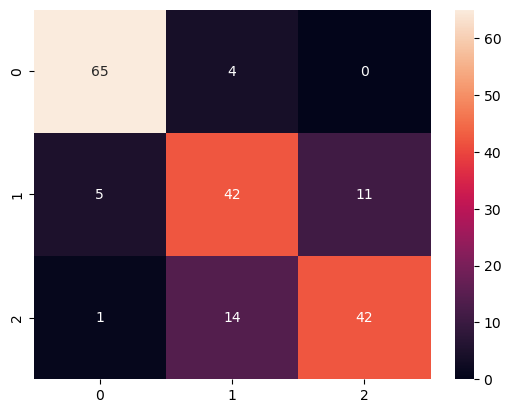

In [20]:
#confusion matrix dan classificatio report
print(classification_report(y_test, y_prediksi))
sb.heatmap(confusion_matrix(y_test, y_prediksi),annot=True)

In [21]:
n_akurasi = []
for k in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train,y_train)
    y_prediksi = knn.predict(x_test)
    akurasi = accuracy_score(y_test,y_prediksi)
    n_akurasi.append(akurasi)
print(n_akurasi)

[0.7880434782608695, 0.8206521739130435, 0.8097826086956522, 0.7880434782608695, 0.7663043478260869, 0.7717391304347826, 0.7663043478260869, 0.7880434782608695, 0.7989130434782609, 0.7934782608695652, 0.7989130434782609, 0.7880434782608695, 0.7771739130434783, 0.7663043478260869, 0.7663043478260869, 0.7717391304347826, 0.7771739130434783, 0.7771739130434783, 0.7880434782608695, 0.782608695652174, 0.7880434782608695, 0.7880434782608695, 0.782608695652174, 0.7989130434782609, 0.7934782608695652, 0.7989130434782609, 0.7989130434782609, 0.8152173913043478, 0.7989130434782609]
